In [10]:
import csv
from random import *

radius = []
separation = []
cen = []

cnt_above1 = 0
cnt_above2 = 0

summ_path = "/home/olga/CAB/CA/data/ALLcen/summary_upgrade.csv"
with open(summ_path) as f:
    csv_reader = csv.reader(f)
    for line in csv_reader:
        #4 -- cluster size, 6 -- radius, 13 -- centromers. 16 -- separation
        if line[0] != "IterationId" and int(line[4]) > 100:
            radius.append(int(line[6]) + randint(-40, +40)/100)
            separation.append(int(line[16]) + randint(-40, 40)/100)
            cen.append([x[1:-1] for x in line[13].strip('][').split(', ')] )
            if int(line[16]) < 5:
                print(line)
            if int(line[6]) > int(line[16]):
                cnt_above1 += 1
            if int(line[6]) > 2 * int(line[16]):
                cnt_above2 += 1
print(radius)
print(separation)
print(cen)  
print(cnt_above1)
print(cnt_above2)

['1', '0', '368474', '255', '22743', '1', '14', '43', '[11115, 5561, 3715, 2336, 16]', "['cen19_0', 'cen1_0', 'cen5_1', 'cen16_0', 'cen5_0']", '0', '44', '170', "['cen19_0', 'cen1_0', 'cen5_1']", '[9203, 1871, 3]', '3', '3', 'mn_4', 'mn_4']
['4', '42677', '325795', '262', '14140', '0', '16', '4', '[4516, 4248, 3030, 2333, 13]', "['cen1_0', 'cen19_0', 'cen5_1', 'cen16_0', 'cen5_0']", '0', '3', '170', "['cen5_1', 'cen19_0', 'cen1_0', 'cen16_0', 'cen5_0']", '[3716, 1944, 1773, 1140, 17]', '3', '3', 'mn_1', 'mn_1']
['42', '185836', '182642', '265', '2353', '0', '9', '14', '[1232, 946, 170, 5]', "['cen1_0', 'cen5_1', 'cen19_0', 'cen5_0']", '0', '14', '170', "['cen1_0', 'cen19_0', 'cen5_1']", '[1226, 167, 4]', '1', '1', 'mn_258', 'mn_258']
['258', '361880', '6599', '267', '2350', '0', '10', '3', '[1232, 944, 169, 5]', "['cen1_0', 'cen5_1', 'cen19_0', 'cen5_0']", '0', '19', '169', "['cen1_0']", '[203]', '1', '1', 'mn_42', 'mn_42']
['259', '361880', '6599', '267', '764', '0', '6', '1', '[764]'

In [11]:
cen_name = ["cen" + str(x) + "_" for x in range(1, 23)] + ["cenX_"]
cen_colors = ["#ef98aa",  "#FA8072", "#FFC0CB", "#BA55D3", "#0000FF", "#87CEEB", "#7FFFD4", "#E0FFFF", "#90EE90", "#008000", 
              "#9ACD32",  "#FFCC00", "#c6df90", "#b784a7", "#7b917b", "#8b00ff",  "#1fcecb","#efdecd", "#1ca9c9", "#44944a", 
             "#e55137", "#ff8e00", "#ff7e93"]

cols = []
for i in range(len(cen)):
    if len(cen[i]) == 1:
        for j in range(len(cen_name)):
            name = cen_name[j]
            if name in cen[i][0]:
                cols.append(cen_colors[j])
    else:
        cols.append("#000000")

print(cols)

['#000000', '#000000', '#000000', '#000000', '#000000', '#000000', '#efdecd', '#FA8072', '#efdecd', '#efdecd', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000', '#9ACD32', '#9ACD32', '#9ACD32', '#9ACD32', '#9ACD32', '#1fcecb', '#FFCC00', '#000000', '#FFCC00', '#7FFFD4', '#FA8072', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#90EE90', '#FA8072', '#efdecd', '#efdecd', '#000000', '#90EE90', '#000000', '#000000', '#000000', '#000000', '#000000', '#FFCC00', '#008000', '#FFCC00', '#efdecd', '#efdecd', '#efdecd', '#FFCC00', '#FFCC00', '#FFCC00', '#000000', '#90EE90', '#008000', '#008000', '#44944a', '#008000', '#E0FFFF', '#E0FFFF', '#E0FFFF', '#E0FFFF', '#ff7e93', '#ff7e93', '#ff7e93', '#ff7e93', '#ff7e93', '#ff7e93', '#ff7e93', '#FFCC00', '#ff7e93', '#ff7e93', '#ff7e93', '#ff7e93', '#ff7e93', '#000000', '#000000', '#000000', '#000000', '#008000', '#000000', '#000000', '#008000', '#1fcecb', '#1fcecb', '#1fcecb', '#1fcecb', '#1fcecb'

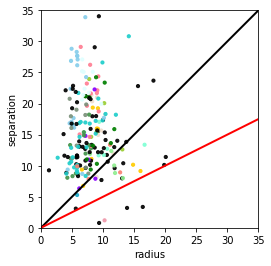

In [12]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.ylim(0, 35)
plt.xlim(0, 35)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("radius")
plt.ylabel("separation")
plt.scatter(radius, separation, c=cols, alpha=0.9, s=10)
plt.plot([0, 35], [0, 35], color = 'black', linewidth = 2)
plt.plot([0, 35], [0, 17.5], color = 'red', linewidth = 2)
plt.show()

f.savefig("RadiusSeparation.pdf", bbox_inches='tight')

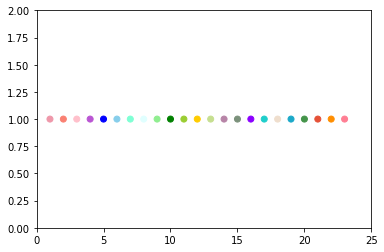

In [8]:
plt.ylim(0, 2)
plt.xlim(0, 25)
plt.scatter([i + 1 for i in range(0, 23)], [1]*23, c=cen_colors, alpha=1)
plt.show()